# Aliasing in the Time- and Frequency  Domains

Original signal $x(t)$ and signal $x[n]$, sampled at $t[n]= nT_s$, $n= 0, 1, 2, \ldots$, where $T_s$ is the sample interval and $f_s = 1/T_s$ is the sample rate. 
\begin{align}
  x(t) &= \cos(2 \pi f_0 t + \phi) &
  x[n] &=  \cos(2 \pi f_0 n T_s) = \cos(\hat\omega_0 n + \phi)  & \hat\omega_0 &= 2 \pi f_0 T_s = 2 \pi \frac{f_0}{f_s}
\end{align}
The sample ponts $x[n]$ will be the same for all normalised frequencies $\hat\omega$ fulfilling
\begin{align}
  \hat\omega &= \hat\omega_0 + 2 \pi n  & &\text{ or } & \hat\omega &=-\hat\omega_0 + 2n \pi & n &= 0, \pm1, \pm2, \pm3, \ldots
\end{align}
When this is converted to linear frequencies, we get that all frequencies $f_a$ will give the same values in the sample points if 
\begin{align}
  f_a &= f_0 + n f_s  & & \text{ or } & f_a &= -f_0 + n f_s 
\end{align}
After the signal has been sampled, there is no way to find out which of the alias frequencies $f_a$ corresponds to the original frequency $f_0$.

The phenomenon is illustrated in the interactive widget below. 

The orange curves represent the original signal. In the frequency plots, all the alias frequencies are shown in blue, while the unique region where $-\tfrac12 f_s \le f \le \tfrac12 f_s$ is illustrated with a green box. One negative and one positive alias frequency will always fall within these limits.

When the signal is reconstructed, the lowest possible frequency is selected. This is the frequency pair that has $|f_a| \le \tfrac12 f_s$, the the pair inside the green box.
This will be the same as the original frequency $f_0$ when $f_0 \le \tfrac12 f_s$. If $f_0$ it is outside this region, the signal will be reconstructed with the alias frequency within the region. 




Label(value='Aliasing in the Time and Frequency Domains', style=LabelStyle(font_weight='bold'))

FloatSlider(value=8.0, description='Frequency [Hz]', layout=Layout(width='60%'), max=40.0, min=0.5, readout_fo…

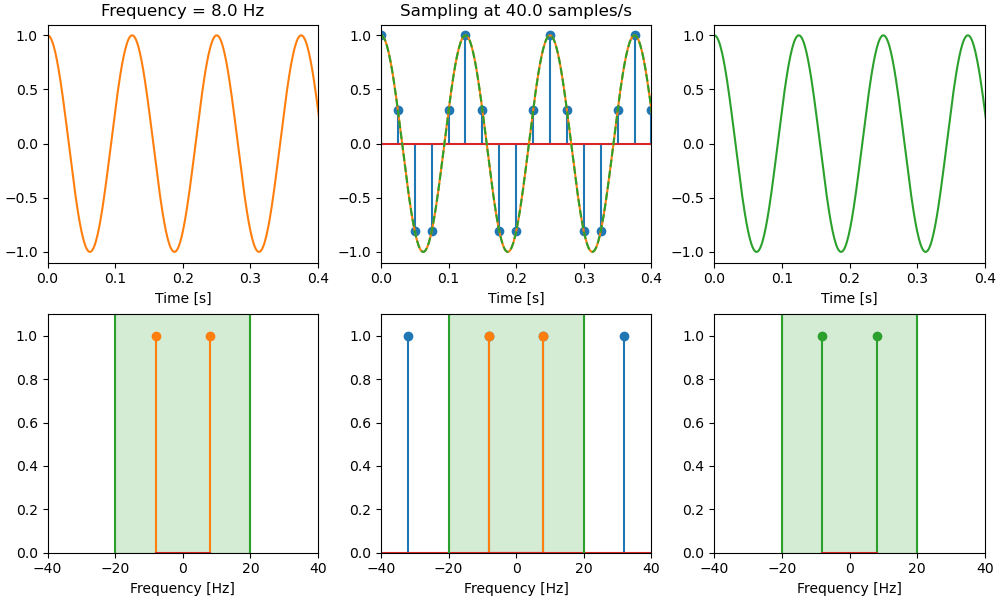

In [2]:
# Load modules for intereactive operation
%matplotlib ipympl
import numpy as np
import ipywidgets as widgets
import aliasing_demo

#  Function that runs the demo interactively
def run_aliasing_demo(frequency, phase_deg, sample_rate):
    """Set values and call plotting function."""
    signal.f = frequency
    signal.fs = sample_rate
    signal.phase = np.radians(phase_deg)
    print(signal.phase)
    signal.plot()
    return

# Define widgets to operate program
title_widget = widgets.Label("Aliasing in the Time and Frequency Domains", 
                             style=dict(font_weight='bold'))

widget_style = dict(description_width='initial')
phase_widget = widgets.FloatSlider(min=-180, max= 180, value=0, step=5, 
                                 description='Phase [deg]',  
                                 readout_format='.0f',
                                 layout=widgets.Layout(width='40%'), 
                                 style=widget_style)

sample_rate_widget = widgets.FloatText(min=1, max= 100, value=40, step=1, 
                                       description='Sample rate [1/s]',  
                                       readout_format='.1f', 
                                       layout=widgets.Layout(width='15%'), 
                                       style=widget_style)

frequency_widget = widgets.FloatSlider(min= 0.5, max= 40, value=8, step=0.5, 
                                       description='Frequency [Hz]', 
                                       readout_format='.1f', 
                                       layout=widgets.Layout(width='60%'), 
                                       style=widget_style)

widget_line = widgets.HBox([phase_widget, sample_rate_widget])

display(title_widget)
display(widget_line)
display(frequency_widget)

# Define signal and run demo
signal = aliasing_demo.FrequencyAliasSignal()

w = widgets.interactive(run_aliasing_demo, frequency=frequency_widget, phase_deg=phase_widget, sample_rate=sample_rate_widget)

# Multiple aliases

GridBox(children=(FloatSlider(value=0.0, description='Phase [deg]', layout=Layout(width='90%'), max=180.0, min…

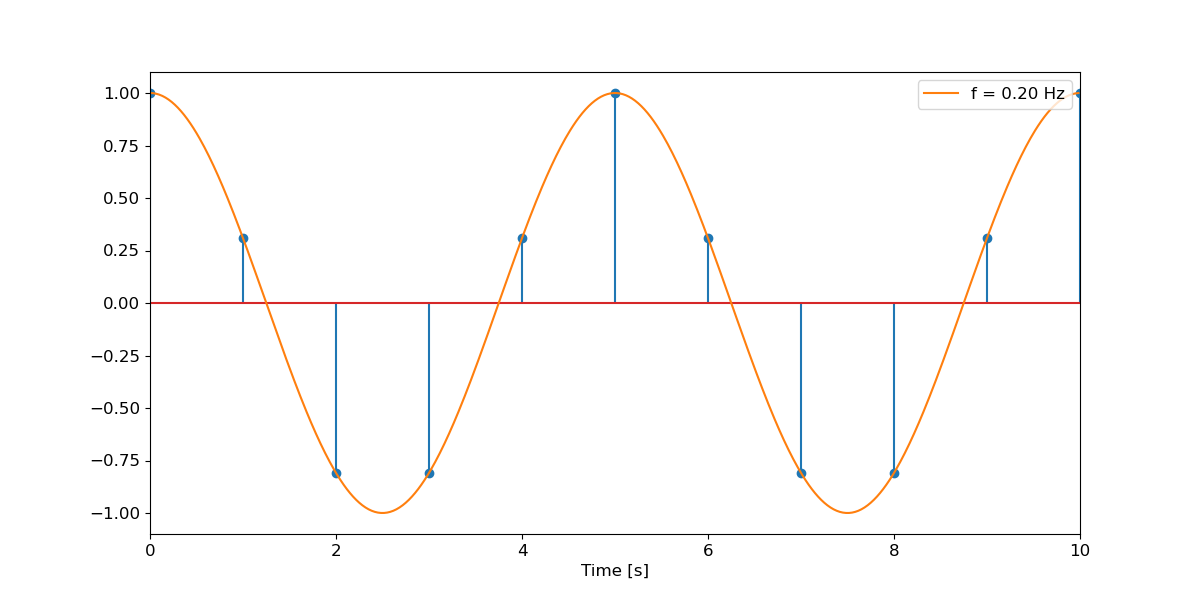

In [5]:
# Load modules for intereactive operation
import ipywidgets as widgets

#  Function that runs the demo interactively
def run_demo(frequency=0.2, phase_deg=0, sample_rate=1, m=0):
    """Set values and call plotting function."""
    x.f = frequency
    x.fs = sample_rate
    x.phase = np.radians(phase_deg)
    x.m = m
    x.plot()
    return

# Define signal and run demo
x = aliasing_demo.MultipleAliasSignal()

frequency_widget = widgets.FloatSlider(value=0.2, min=0.02, max=2.0, step=0.01, description='Frequency [Hz]', readout_format='.2f', layout=widgets.Layout(width='90%'))
phase_widget = widgets.FloatSlider(value=0, min=-180, max=180, step=5, description='Phase [deg]',  readout_format='.0f', layout=widgets.Layout(width='90%'))
sample_rate_widget = widgets.FloatText(value=1.0, min=0.2, max=2, step=0.1, description='Sample rate [1/s]', readout_format='.1f', layout=widgets.Layout(width='30%'))
alias_widget = widgets.IntText(value=0, min=-5, max=5, description='Alias number', layout=widgets.Layout(width='30%'))

items = [phase_widget, sample_rate_widget, frequency_widget, alias_widget  ]
widget_grid = widgets.GridBox(items, layout=widgets.Layout(grid_template_columns="repeat(2, 45%)"))
display(widget_grid)

w = widgets.interactive(run_demo, frequency=frequency_widget, phase_deg=phase_widget, sample_rate=sample_rate_widget, m=alias_widget)